## IMORTING ALL THE LIBRARIES WHICH ARE NEEDED

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,CategoricalNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import joblib

## READING DATASET

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\ed_train.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,NO,2.2,NO,1,NO,7,0.6,188.0,2,...,20.0,756.0,2549.0,9,7,19,0,0,1,1
1,1021,yes,0.5,yes,0,yes,53,0.7,136.0,3,...,905.0,1988.0,2631.0,17,3,7,1,1,0,2
2,563,yes,0.5,yes,2,yes,41,0.9,145.0,5,...,1263.0,1716.0,2603.0,11,2,9,1,1,0,2
3,615,yes,2.5,NO,0,NO,10,0.8,131.0,6,...,1216.0,1786.0,2769.0,16,8,11,1,0,0,2
4,1821,yes,1.2,NO,13,yes,44,0.6,141.0,2,...,1208.0,1212.0,1411.0,8,2,15,1,1,0,1


## ANALYSIS ON DATASET (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1992 non-null   int64  
 1   blue           1992 non-null   object 
 2   clock_speed    1992 non-null   float64
 3   dual_sim       1992 non-null   object 
 4   fc             1992 non-null   int64  
 5   four_g         1992 non-null   object 
 6   int_memory     1992 non-null   int64  
 7   m_dep          1992 non-null   float64
 8   mobile_wt      1989 non-null   float64
 9   n_cores        1992 non-null   int64  
 10  pc             1992 non-null   int64  
 11  px_height      1991 non-null   float64
 12  px_width       1989 non-null   float64
 13  ram            1989 non-null   float64
 14  sc_h           1992 non-null   int64  
 15  sc_w           1992 non-null   int64  
 16  talk_time      1992 non-null   int64  
 17  three_g        1992 non-null   int64  
 18  touch_sc

* IN THIS DATASET FEW COLUMNS ARE IN DEFFERENT DATA TYPES SO WE NEED TO CHANGE THAT

In [5]:
data[['n_cores','three_g','touch_screen','wifi']]=data[['n_cores','three_g','touch_screen','wifi']].astype(object)

* CONVERTED ALL DEFFERENT DTYPE COLUMNS INTO ACTUAL DTYPES

In [6]:
(data.isna().mean()*100)

battery_power    0.000000
blue             0.000000
clock_speed      0.000000
dual_sim         0.000000
fc               0.000000
four_g           0.000000
int_memory       0.000000
m_dep            0.000000
mobile_wt        0.150602
n_cores          0.000000
pc               0.000000
px_height        0.050201
px_width         0.150602
ram              0.150602
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
wifi             0.000000
price_range      0.000000
dtype: float64

* 'mobile_wt','px_height','px_width','ram' COLUMNS ARE CONTAIN NAN/MISSING VALUES AND THAT ARE <5% SO WE NEED TO DELET

In [7]:
data=data.dropna().reset_index(drop=True)

In [8]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,NO,2.2,NO,1,NO,7,0.6,188.0,2,...,20.0,756.0,2549.0,9,7,19,0,0,1,1
1,1021,yes,0.5,yes,0,yes,53,0.7,136.0,3,...,905.0,1988.0,2631.0,17,3,7,1,1,0,2
2,563,yes,0.5,yes,2,yes,41,0.9,145.0,5,...,1263.0,1716.0,2603.0,11,2,9,1,1,0,2
3,615,yes,2.5,NO,0,NO,10,0.8,131.0,6,...,1216.0,1786.0,2769.0,16,8,11,1,0,0,2
4,1821,yes,1.2,NO,13,yes,44,0.6,141.0,2,...,1208.0,1212.0,1411.0,8,2,15,1,1,0,1


In [9]:
(data.isna().mean()*100)

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

* AFTER DROPING NANS DATA IS LIKE TTHIS

<AxesSubplot:>

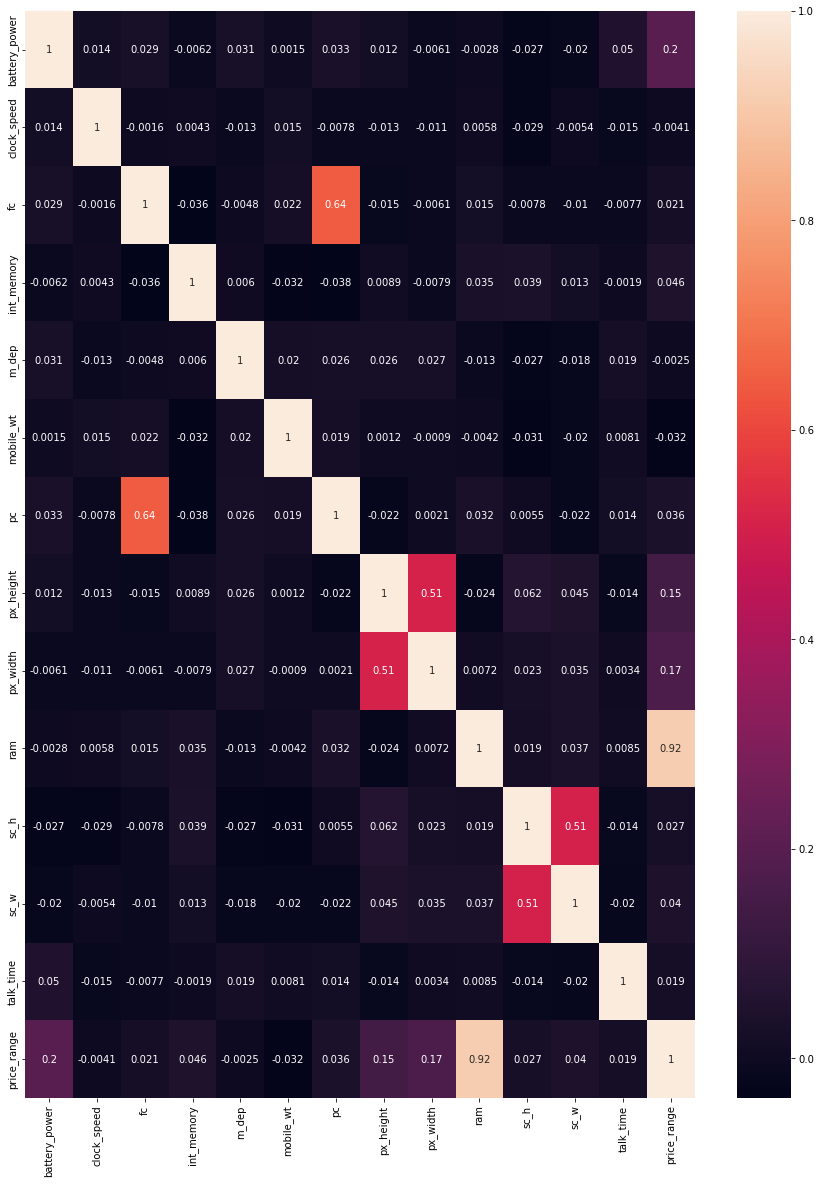

In [10]:
plt.figure(figsize=(15,20))
sns.heatmap(data.corr(),annot=True)

* 'PC' & 'FC' AND 'RAM' & 'PRICE_RANGE' COLUMNS ARE HIGHLEY CO-RELATED

In [11]:
fv = data.drop(['price_range'],axis=1)
cv = data[['price_range']]

* SEPERATED DATA "Xi'S" WITH "Yi'S"

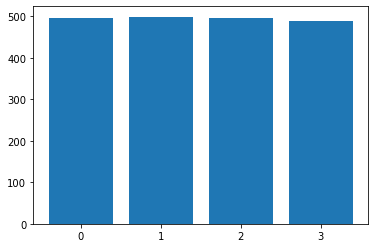

In [12]:
plt.bar(cv['price_range'].unique(),cv.value_counts().values)
plt.xticks(cv['price_range'].unique())
plt.show()

* IN THIS DATASET ALL THE CATOGERIES ARE ALMOST EQUAL BUT BALENCE IT

<AxesSubplot:>

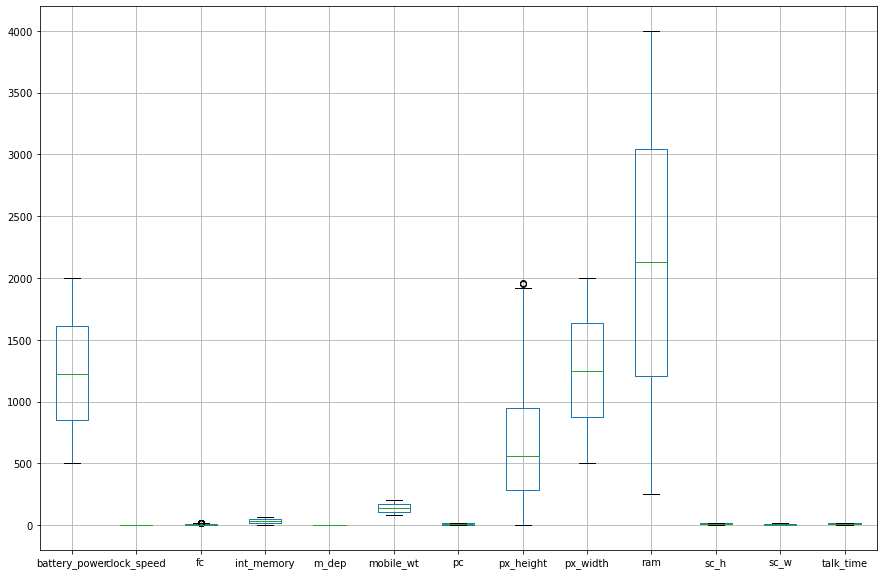

In [13]:
ob=[]
it=[]
for i in fv.columns:
    if (fv[i].dtype)=='O':
        ob.append(i)
    else:
        it.append(i)
plt.figure(figsize=(15,10))
fv[it].boxplot()

* IN THIS DATASET 'px_height','fc' COLUMNS ARE CONTAIN FEW OUTLIERS

In [14]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,train_size=0.8,stratify=cv,random_state=1)

* WITH THE HELP OF THIS CODE I HAVE SPLITTED MY DATASET INTO "TRAINS AND TESTS"

In [15]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1883,1075,NO,0.5,yes,2,NO,11,0.2,122.0,1,16,271.0,1769.0,3927.0,8,3,7,1,0,0
1677,1219,NO,1.6,yes,5,NO,4,0.3,169.0,6,7,1419.0,1698.0,1998.0,9,2,4,0,0,0
1060,1659,yes,2.5,NO,2,NO,41,0.1,88.0,7,18,787.0,1515.0,545.0,12,0,9,0,1,1
1675,1314,yes,2.8,yes,13,yes,5,1.0,87.0,4,18,82.0,512.0,3411.0,17,16,18,1,0,0
1592,1494,NO,1.6,yes,4,yes,24,0.2,101.0,1,17,979.0,1190.0,3614.0,15,12,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1375,yes,1.3,yes,2,NO,12,0.1,105.0,1,13,898.0,1687.0,2890.0,17,1,12,0,0,0
1583,1864,NO,2.2,NO,0,yes,7,0.1,142.0,1,2,225.0,1545.0,2258.0,10,1,10,1,0,0
325,1730,NO,2.0,yes,0,yes,20,0.1,143.0,4,10,418.0,1023.0,1595.0,14,0,12,1,1,0
777,1892,yes,0.7,NO,5,NO,47,0.4,110.0,4,10,1399.0,1564.0,2172.0,17,14,3,1,1,1


In [16]:
x_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

* IN D TRAIN THERE IS NO NULL VALUES THERE BUT WE NEED TO RESET THE INDEXES

In [17]:
x_train=x_train.reset_index(drop=True)

In [18]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1075,NO,0.5,yes,2,NO,11,0.2,122.0,1,16,271.0,1769.0,3927.0,8,3,7,1,0,0
1,1219,NO,1.6,yes,5,NO,4,0.3,169.0,6,7,1419.0,1698.0,1998.0,9,2,4,0,0,0
2,1659,yes,2.5,NO,2,NO,41,0.1,88.0,7,18,787.0,1515.0,545.0,12,0,9,0,1,1
3,1314,yes,2.8,yes,13,yes,5,1.0,87.0,4,18,82.0,512.0,3411.0,17,16,18,1,0,0
4,1494,NO,1.6,yes,4,yes,24,0.2,101.0,1,17,979.0,1190.0,3614.0,15,12,9,1,0,0


* RESETTED INDEXES & THESE OUR FINAL DATASET TO TRAIN THE MODEL WE NEED TO CONVERT TO VECTORS

In [19]:
ohe = OneHotEncoder()

In [20]:
tr = ohe.fit_transform(x_train[ob]).toarray()

In [21]:
col_names = ohe.get_feature_names().tolist()

In [22]:
x_train[col_names] = pd.DataFrame(tr).applymap(int)

In [23]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,x3_5,x3_6,x3_7,x3_8,x4_0,x4_1,x5_0,x5_1,x6_0,x6_1
0,1075,NO,0.5,yes,2,NO,11,0.2,122.0,1,...,0,0,0,0,0,1,1,0,1,0
1,1219,NO,1.6,yes,5,NO,4,0.3,169.0,6,...,0,1,0,0,1,0,1,0,1,0
2,1659,yes,2.5,NO,2,NO,41,0.1,88.0,7,...,0,0,1,0,1,0,0,1,0,1
3,1314,yes,2.8,yes,13,yes,5,1.0,87.0,4,...,0,0,0,0,0,1,1,0,1,0
4,1494,NO,1.6,yes,4,yes,24,0.2,101.0,1,...,0,0,0,0,0,1,1,0,1,0


In [24]:
y_train.value_counts()/len(y_train)

price_range
1              0.251735
0              0.251104
2              0.250473
3              0.246688
dtype: float64

* THIS DATA IS ABALENCED DATASET

In [25]:
x_train.drop(ob,axis=1,inplace=True)

In [26]:
x_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,...,x3_5,x3_6,x3_7,x3_8,x4_0,x4_1,x5_0,x5_1,x6_0,x6_1
0,1075,0.5,2,11,0.2,122.0,16,271.0,1769.0,3927.0,...,0,0,0,0,0,1,1,0,1,0
1,1219,1.6,5,4,0.3,169.0,7,1419.0,1698.0,1998.0,...,0,1,0,0,1,0,1,0,1,0
2,1659,2.5,2,41,0.1,88.0,18,787.0,1515.0,545.0,...,0,0,1,0,1,0,0,1,0,1
3,1314,2.8,13,5,1.0,87.0,18,82.0,512.0,3411.0,...,0,0,0,0,0,1,1,0,1,0
4,1494,1.6,4,24,0.2,101.0,17,979.0,1190.0,3614.0,...,0,0,0,0,0,1,1,0,1,0


In [27]:
x_tc = x_train.copy()

In [28]:
#si=SimpleImputer() --- if any null values fill with simple imputer here only
#t_d=pd.DataFrame(si.fit_transform(x_train_c),columns=x_train.columns)
# after filling the nan's pls see the distribution in distplot
# sns.distplot(t_d["mobile_wt"])
# sns.distplot(x_train["mobile_wt"])
# see each columns distribution which columns we are filled

In [29]:
y_train.value_counts()

price_range
1              399
0              398
2              397
3              391
dtype: int64

* WE NEED TO BALENCE THE Y_TRAIN DATA HERE

In [30]:
y_train = y_train.reset_index(drop=True)

In [31]:
ros = RandomOverSampler()
x,y = ros.fit_resample(x_tc,y_train)

* BALENCING THE DATA BASED ON CLASSES

In [32]:
x_train = pd.DataFrame(x)
y_train = pd.DataFrame(y)

* FINAL BALENCED DATASETS

In [33]:
knn = KNeighborsClassifier()
kmodel = knn.fit(x_train,y_train)

* TILL HERE WE ARE CREATING MODEL AND LEARN THE DATASETS

In [34]:
x_test = x_test.reset_index(drop=True)

* RESET THE INDEXES

In [35]:
d_oh = ohe.transform(x_test[ob]).toarray()
s = pd.DataFrame(d_oh)
s1 = ohe.get_feature_names()
x_test[s1] = s

* APPLYING ONEHOTENCODER ON TO CATOGERICAL FEARURES

In [36]:
x_test = x_test.drop(ob,axis=1)

* DROPPING THE OBJECT COLUMNS

In [37]:
x_test.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,...,x3_5,x3_6,x3_7,x3_8,x4_0,x4_1,x5_0,x5_1,x6_0,x6_1
0,854,0.5,2,30,0.5,125.0,5,518.0,1152.0,2889.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1893,0.5,1,23,0.1,179.0,3,1203.0,1432.0,1482.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,616,1.9,13,44,0.8,81.0,17,651.0,1618.0,3366.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1093,0.5,1,31,0.6,171.0,12,1310.0,1420.0,1646.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1218,1.8,1,14,0.5,147.0,4,229.0,616.0,398.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [38]:
predicted = kmodel.predict(x_test)

In [39]:
accuracy_score(predicted,y_test)

0.9269521410579346

* ACCURACY WHEN APPLYNG KNN MODEL

In [40]:
nb = GaussianNB()
gmodel = nb.fit(x_train,y_train)

In [41]:
nbpredicted = gmodel.predict(x_test)

In [42]:
accuracy_score(nbpredicted,y_test)

0.8211586901763224

* accuracy when we applying Navie bayes

## TESTING THE MODELS

In [43]:
data1 = pd.read_csv(r"C:\Users\HP\Downloads\test.csv")

In [44]:
data1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,yes,1.8,yes,14,yes,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


* IN THIS DATA A NEW FEATURE CALLED "ID" IS INCLUDED IT WILL NOT USE SO WE NEED TO DROP THIS

In [45]:
data1 = data1.drop('id',axis=1)

In [46]:
data1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,yes,1.8,yes,14,yes,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [47]:
dat = ohe.transform(data1[ob].loc[[0]].values).toarray()

In [48]:
s3 = ohe.get_feature_names()

In [49]:
s3

array(['x0_NO', 'x0_yes', 'x1_NO', 'x1_yes', 'x2_NO', 'x2_yes', 'x3_1',
       'x3_2', 'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8', 'x4_0',
       'x4_1', 'x5_0', 'x5_1', 'x6_0', 'x6_1'], dtype=object)

In [50]:
data1[s3] = pd.DataFrame(dat)

In [51]:
data1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,x3_5,x3_6,x3_7,x3_8,x4_0,x4_1,x5_0,x5_1,x6_0,x6_1
0,1043,yes,1.8,yes,14,yes,5,0.1,193,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,841,1,0.5,1,4,1,61,0.8,191,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
da = data1.loc[[0]]

In [53]:
da = da.drop(da[ob],axis=1)

## SAVING THE FINAL MODEL

In [54]:
joblib.dump(kmodel,"final.joblib")

['final.joblib']

In [55]:
k = joblib.load("final.joblib")

* ACCESSING ONE ROW

In [56]:
da

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,...,x3_5,x3_6,x3_7,x3_8,x4_0,x4_1,x5_0,x5_1,x6_0,x6_1
0,1043,1.8,14,5,0.1,193,16,226,1412,3476,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


* THIS IS THE PREDICTED 'CLASS LABLE'

In [57]:
k.predict(da.loc[[0]])

array([3], dtype=int64)